# Ejercicio 3

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

In [2]:
G=nx.read_gml('as-22july06.gml')
#list(G)

In [3]:
G.number_of_edges()
list(G.degree)[4][1]

1

In [4]:
i=0
vector_enlaces=[]
cantidad_nodos = G.number_of_nodes()
while i<cantidad_nodos:
    vector_enlaces+=[list(G.degree)[i][1]]
    i+=1
print(len(vector_enlaces))

22963


2390

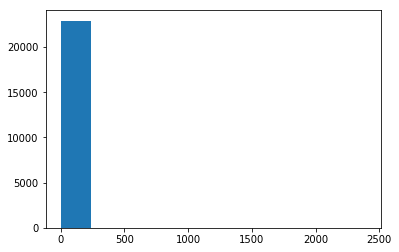

In [5]:
plt.hist(vector_enlaces)
max(vector_enlaces)

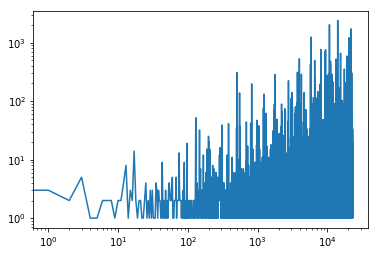

In [11]:
######## Para bins en escala logaritmica

#import pylab as pl
#import numpy as np

plt.loglog(vector_enlaces)

#data = np.random.normal(size=10000)
#plt.hist(data, bins=np.logspace(np.log10(0.1),np.log10(1.0), 50))
#plt.gca().set_xscale("log")
plt.show()

